# Getting code from a json and trying to figure out what initial tasks were 🚀

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

## Inspecting the data 👮

In [5]:
data = pd.read_csv('Excercise1/clustering_data.csv')
data.shape

(1545, 2)

In [6]:
data.dtypes

x    float64
y    float64
dtype: object

In [7]:
data.head()

,x,y
0,3.80286,2.15835
1,5.18384,2.21139
2,3.15722,2.30568
3,5.56977,2.37613
4,4.11252,2.95963


## Plot datapoints to visualize clusters 💁

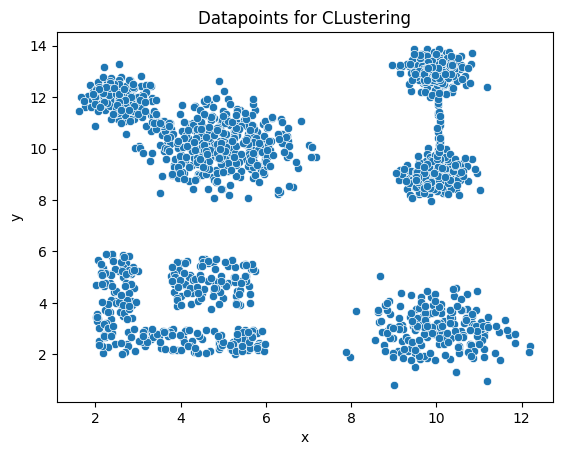

In [8]:
sns.scatterplot(x='x', y='y', data=data)
plt.title("Datapoints for CLustering")
plt.show()

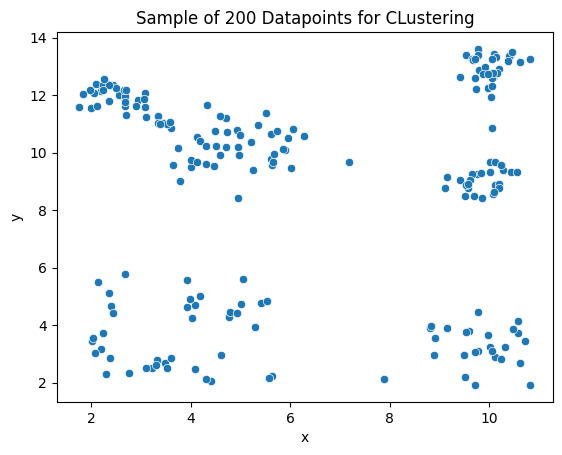

In [9]:
sample = data.sample(200)
sns.scatterplot(x='x', y='y', data=sample)
plt.title("Sample of 200 Datapoints for CLustering")
plt.show()

## Wild visualizations for clustering data 😱

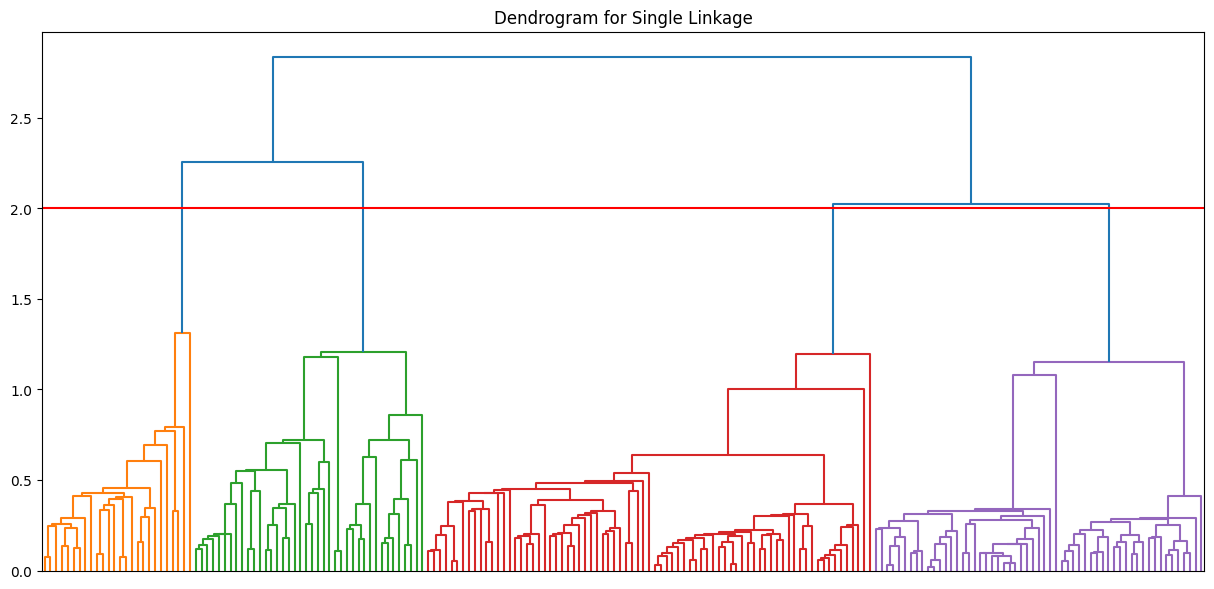

In [10]:
Z = linkage(sample, metric='euclidean', method='single')
plt.figure(figsize=(15,7))
dendrogram(Z, distance_sort='descending', no_labels=True)
plt.axhline(y=2, color='r', linestyle='-')
plt.title("Dendrogram for Single Linkage")
plt.show()

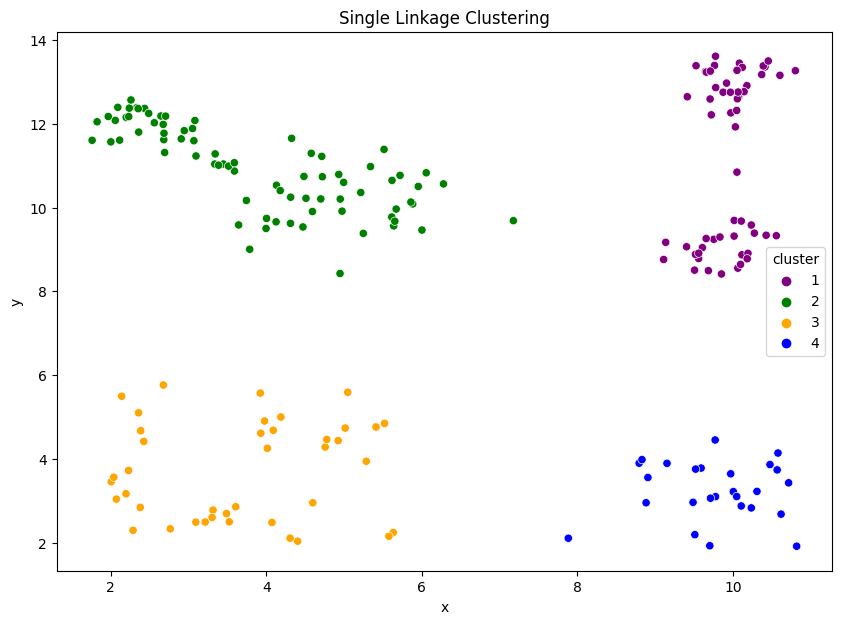

In [11]:
sample['cluster'] = fcluster(Z, 4, criterion='maxclust')
plt.figure(figsize=(10,7))
sns.scatterplot(x='x', y='y', hue='cluster', data=sample, palette=["purple", "green", "orange", "blue"])
plt.title("Single Linkage Clustering")
plt.show()

In [15]:
data_kmeans = data.copy()

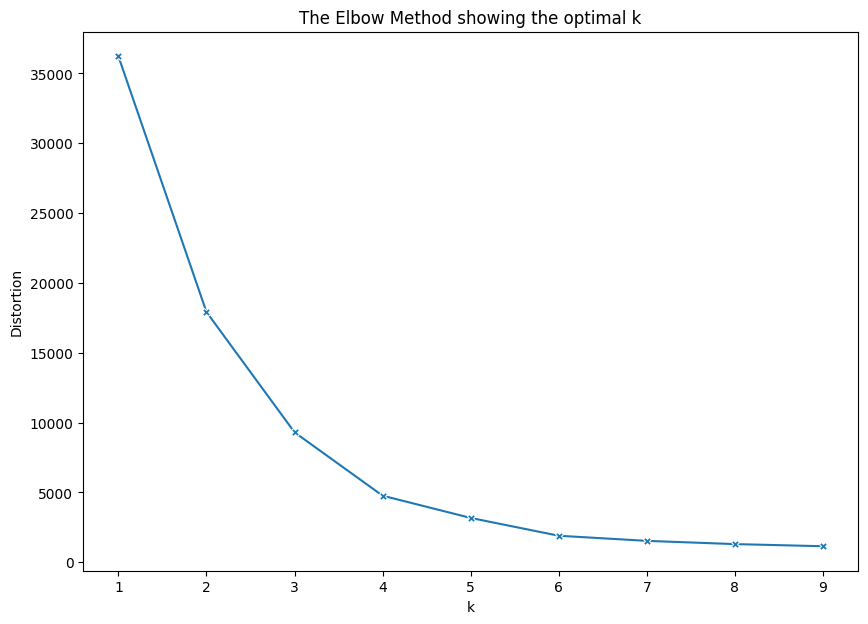

In [16]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_kmeans)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,7))
sns.lineplot(x=K, y=distortions, marker="X")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

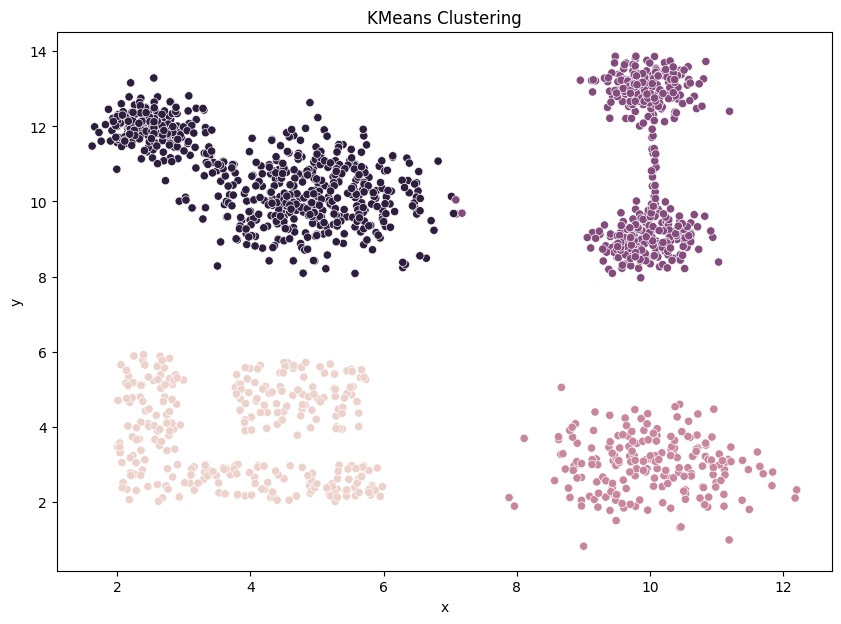

In [50]:
kmeans = KMeans(n_clusters=4, init="random", n_init=1, max_iter=12).fit(data_kmeans)
data_kmeans['cluster'] = kmeans.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(x='x', y='y', hue='cluster', data=data_kmeans, legend=False)
plt.title("KMeans Clustering")
plt.show()

## Implementing kmeans somewhat from scratch 🤓

In [32]:
data_kmeans = data.copy()
def getcentroids(df, k):
    x_cent = np.random.uniform(df.iloc[:,0].min(), df.iloc[:,0].max(), k)
    y_cent = np.random.uniform(df.iloc[:,1].min(), df.iloc[:,1].max(), k)
    return pd.DataFrame({'x': x_cent, 'y': y_cent})

def kmeans_clust(x,k):
    fd = x.copy()
    # STEP1: Choose k random points as initial centroids 
    centroids = getcentroids(x, k)
    # STEP2: Finding the distance between centroids and all the points in the dataset
    distances = cdist(x, centroids, metric='euclidean')
    # STEP3: Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
    fig, ax = plt.subplots(4, 3, figsize=(18, 10))
    ax = ax.ravel()
    fig.tight_layout(pad=4)
    # STEP4: Repeating steps 2 and 3 until convergence (here is set to 12 iterations)
    for iter in range(12):
        centroids = []
        for idx in range(k):
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)
        # Update Centroids
        centroids = np.vstack(centroids)
        distances = cdist(x, centroids, metric='euclidean')
        points = np.array([np.argmin(i) for i in distances])
        # Plotting
        fd['cluster'] = points
        cent = pd.DataFrame(centroids)
        sns.scatterplot(x='x', y='y', hue='cluster', ax=ax[iter], data=fd, legend=False)
        sns.scatterplot(x=0, y=1, ax=ax[iter], data=cent, legend=False) 
        ax[iter].set_title(f"Iteration {iter+1}")
    
    return points


## Plotting the results of our (own 😄) algorithm - unknown to Copilot

array([1, 1, 1, ..., 3, 3, 3])

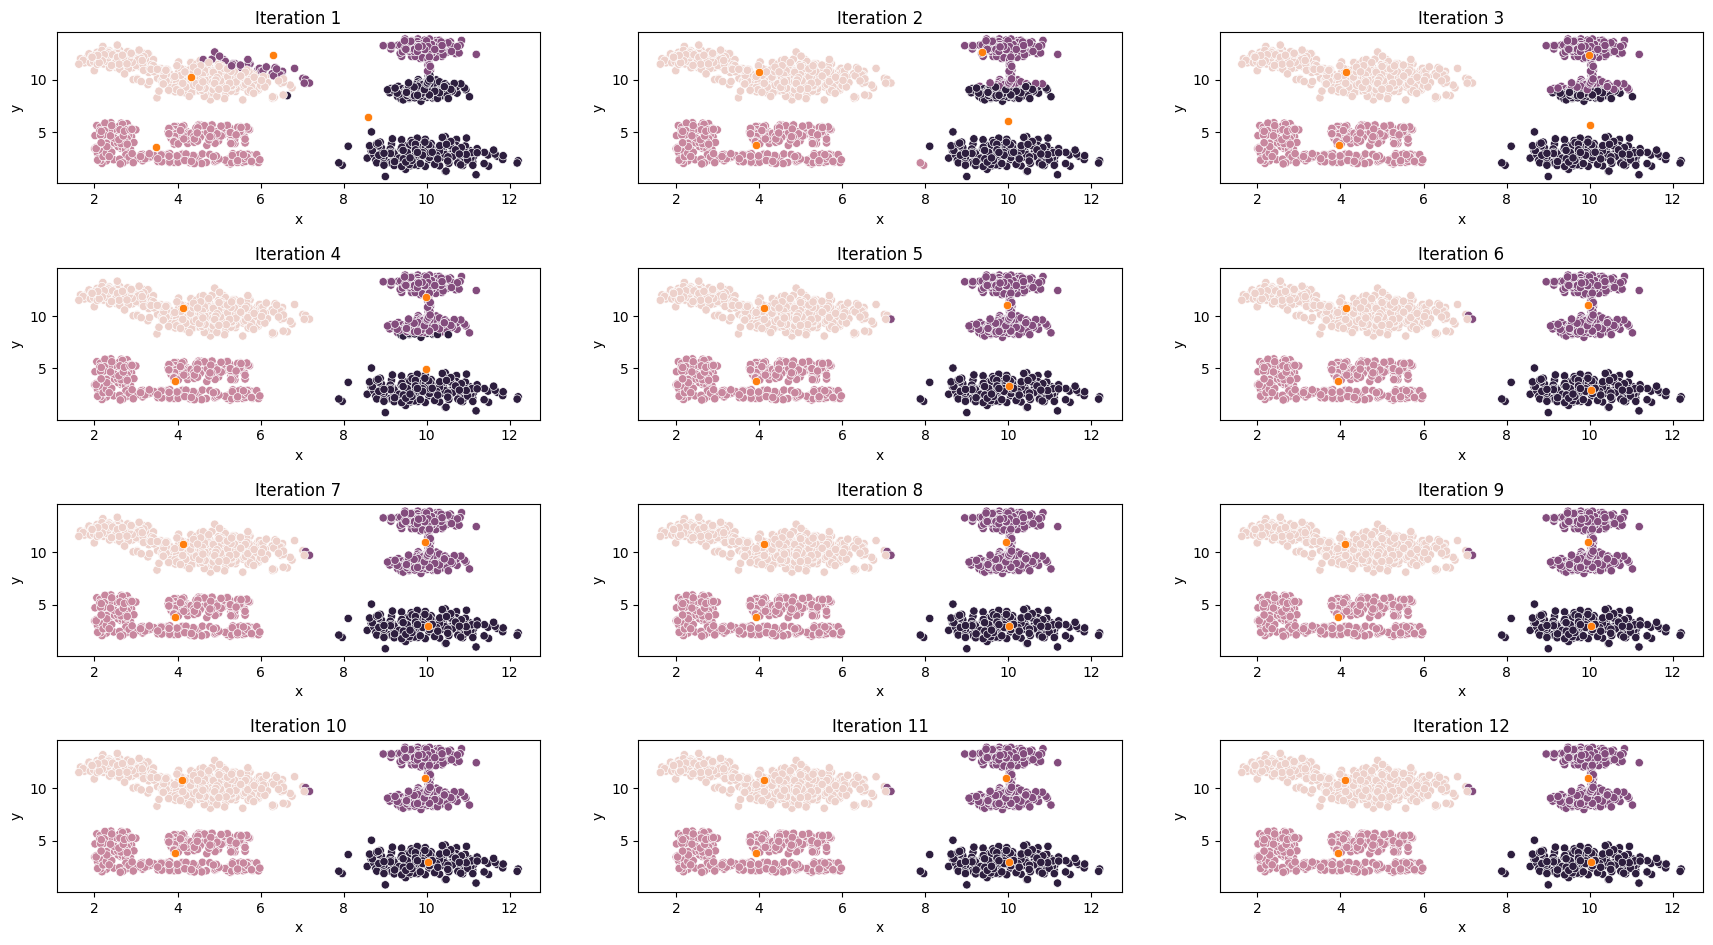

In [33]:
kmeans_clust(data_kmeans, 4)

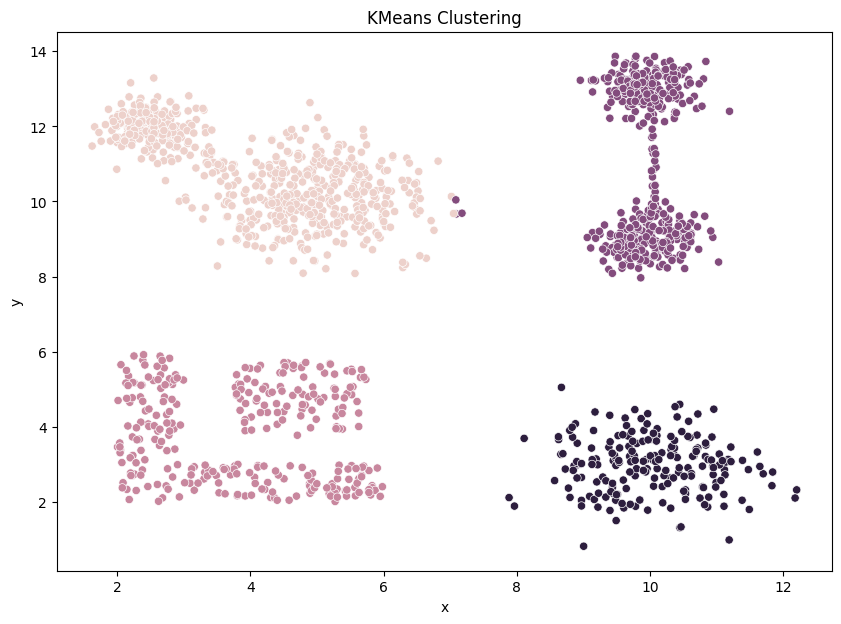

In [29]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=12).fit(data_kmeans)
data_kmeans['cluster'] = kmeans.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(x='x', y='y', hue='cluster', data=data_kmeans, legend=False)
plt.title("KMeans Clustering")
plt.show()

## Implementing Density-Based Spatial Clustering of Applications with Noise (DBSCAN) like a Dully

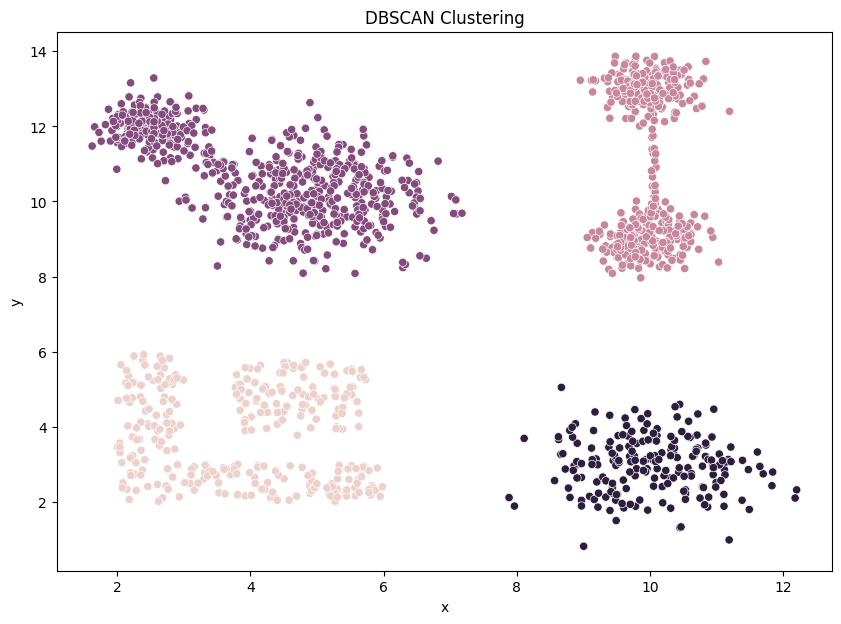

In [40]:
data_dbs = data.copy()
cluster = DBSCAN(eps=0.9, min_samples=5).fit(data_dbs)
data_dbs['cluster'] = cluster.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(x='x', y='y', hue='cluster', data=data_dbs, legend=False)
plt.title("DBSCAN Clustering")
plt.show()


### Setting *eps* to 0.9 gave the perfect clusters, 0.8 was no flawless

## ❤️Thesis: The teacher copied 99% of this code, just running Copilot gave me those code snippets